In [27]:
using Statistics
using Plots, Plots.PlotMeasures, Measurements
using CSV
using DataFrames
using LaTeXStrings
using Formatting
using ColorSchemes

include("analysis.jl")
include("utils.jl")

dir = pwd()
outputFile = "julia_notebook_ressource_tmp.csv"

"julia_notebook_ressource_tmp.csv"

In [26]:
function fast_tanh(x)
    if (x < -4.971786858528029)
        return -1;
    end
    if (x > 4.971786858528029)
        return 1;
    end
    x2 = x * x;
    a = x * (135135.0 + x2 * (17325.0 + x2 * (378.0 + x2)));
    b = 135135.0 + x2 * (62370.0 + x2 * (3150.0 + x2 * 28.0));
    return a / b;
end

function three_lin_tanh(x)
    if (x < -1.299725497278728)
        return -1;
    end
    if (x > 1.299725497278728)
        return 1;
    end
    return x * 0.769393231181298;
end

function five_lin_tanh(x)
    if (x < -0.818631533308157)
        if (x < -1.979238406276971)
            return -1;
        end
        return x * 0.235809350838973 - 0.533277076260264;
    end
    if (x > 0.818631533308157)
        if (x > 1.979238406276971)
            return 1;
        end
        return x * 0.235809350838973 + 0.533277076260264;
    end
    return x * 0.887234387088490;
end

function seven_lin_tanh(x)
    if (x < -0.624132858395671) 
        if (x < -2.410509184849241) 
            return -1;
        else
            if (x < -1.301659605617803) 
                return x*0.103110372745653 - 0.751451499443375;
            else 
                return x*0.450656591171619 - 0.299064625833073;
            end
        end
    else 
        if (x < 1.301659605617803) 
            if (x < 0.624132858395671) 
                return x*0.929824803211947;
            else 
                return x*0.450656591171619 + 0.299064625833073;
            end
        else 
            if (x < 2.410509184849241) 
                return x*0.103110372745653 + 0.751451499443375;
            else 
                return 1;
            end
        end
    end
end


function fifteen_lin_tanh(x)
    if (x < -0.349846806360468)
        if (x > -1.288690112231558)
            if (x > -0.652273105339896)
                    return 0.784454209160348*x - 0.067136203627008;
            else
                if (x > -0.952698399354790)
                    return 0.558066602782327*x - 0.214802750649666;
                else
                    return 0.349394991344478*x - 0.413603860857289;
                end
            end
        else
            if (x > -2.289691672012657)
                if (x > -1.703950163909747)
                    return 0.184190996012522*x - 0.626500616142730;
                else
                    return 0.073287597472899*x - 0.815474480262468;
                end
            else
                if (x > -3.369261331568106)
                    return 0.015487206401210*x - 0.947819554338388;
                else
                    return -1;
                end
            end
        end
    else
        if (x < 1.288690112231558)
            if (x < 0.652273105339896)
                if (x < 0.349846806360468)
                    return 0.976355928445541*x;
                else
                    return 0.784454209160348*x + 0.067136203627008;
                end
            else
                if (x < 0.952698399354790)
                    return 0.558066602782327*x + 0.214802750649666;
                else 
                    return 0.349394991344478*x + 0.413603860857289;
                end
            end
        else
            if (x < 2.289691672012657)
                if (x < 1.703950163909747) 
                    return 0.184190996012522*x + 0.626500616142730;
                else
                    return 0.073287597472899*x + 0.815474480262468;
                end
            else
                if (x < 3.369261331568106)
                    return 0.015487206401210*x + 0.947819554338388;
                else
                    return 1;
                end
            end
        end
    end
end

fifteen_lin_tanh (generic function with 1 method)

In [28]:
x = LinRange(-5, 5, 10000);

In [ ]:
p1 = plot(x, tanh.(x), label="tanh")
p1 = plot!(x, fifteen_lin_tanh.(x), label="fast tanh")

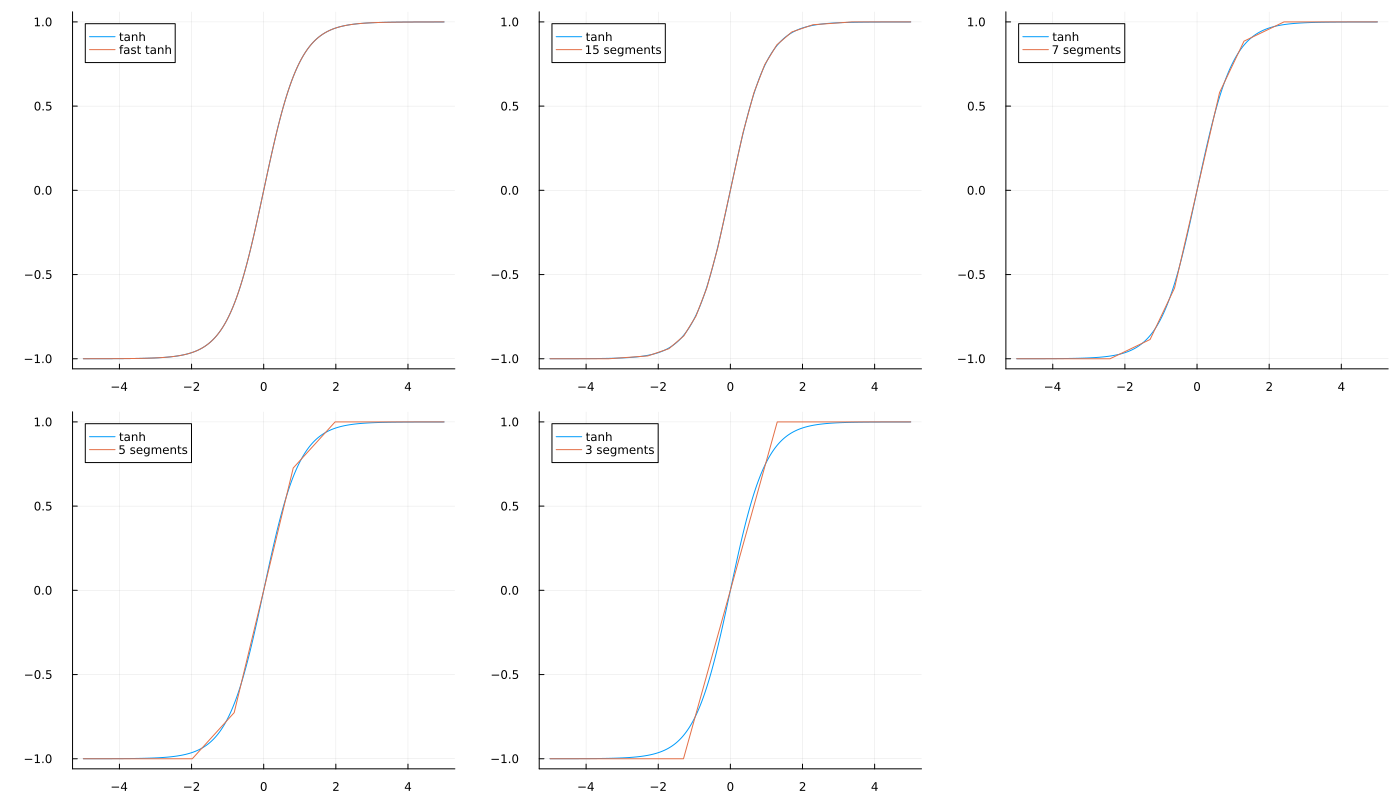

In [30]:
p1 = plot(x, tanh.(x), label="tanh")
p1 = plot!(x, fast_tanh.(x), label="fast tanh")

p2 = plot(x, tanh.(x), label="tanh")
p2 = plot!(x, fifteen_lin_tanh.(x), label="15 segments")


p3 = plot(x, tanh.(x), label="tanh")
p3 = plot!(x, seven_lin_tanh.(x), label="7 segments")

p4 = plot(x, tanh.(x), label="tanh")
p4 = plot!(x, five_lin_tanh.(x), label="5 segments")

p5 = plot(x, tanh.(x), label="tanh")
p5 = plot!(x, three_lin_tanh.(x), label="3 segments")


plot(p1, p2, p3, p4, p5, layout=grid(2, 3), size=(1400, 800), leftmargin=20px)

In [ ]:
savefig("tanh_approximations.png")

In [ ]:
mtanh = 8.3468;      stanh = 0.004859;
mtanhf = 3.5979;     stanhf = 0.004917;
mtanh15 = 2.0512;    stanh15 = 0.002619;
mtanh15f = 1.6797;   stanh15f = 0.004677;
mtanh15sf = 1.6893;  stanh15sf = 0.004630;
mtanh7 = 1.9722;     stanh7 = 0.002585;
mtanh5 = 1.8348;     stanh5 = 0.003783;
mtanh3 = 1.4189;     stanh3 = 0.004936;
mtanh0 = 0.9553;     stanh0 = 0.002114;

mrange = [mtanh, mtanhf, mtanh15, mtanh7, mtanh5, mtanh3, mtanh0];
srange = [stanh, stanhf, stanh15, stanh7, stanh5, stanh3, stanh0] .* sqrt(10000);

macc = [mtanh15, mtanh15f, mtanh15sf];
sacc = [stanh15, stanh15f, stanh15sf] .* sqrt(10000);

In [ ]:
b1 = bar(["tanh", "tanhf", "tanh15", "tanh7", "tanh5", "tanh3", "tanh0"], mrange .± srange, title="Full Time", ylabel="Time [µs]", ylims=[0, mrange[1] + srange[1]], label="")
b2 = bar(["tanh", "tanhf", "tanh15", "tanh7", "tanh5", "tanh3", "tanh0"], mrange .- mrange[end] .± srange, title="Corrected Time", ylims=[0, mrange[1] + srange[1]], label="")
plot(b1, b2, layout=grid(1,2), size= (1200,500), leftmargin=20px)

In [ ]:
savefig("time_tanh.png")

In [ ]:
b1 = bar(["tanh15", "tanh15 fixed", "tanh15 precompute"], macc .± sacc, title="Full Time", ylabel="Time [µs]", ylims=[0, macc[1] + sacc[1]], label="")
b2 = bar(["tanh15", "tanh15 fixed", "tanh15 precompute"], macc .- mrange[end] .± sacc, title="Corrected Time", ylims=[0, macc[1] + sacc[1]], label="")
plot(b1, b2, layout=grid(1, 2), size=(1200, 500), leftmargin=20px)

In [ ]:
savefig("time_tanh_fixed.png")

In [ ]:
short_data = grid_from_directory("data/chart_thesis_model/short", 15.0)
mid_data = grid_from_directory("data/chart_thesis_model/mid", 15.0)
long_data = grid_from_directory("data/chart_thesis_model/long", 15.0)

In [ ]:
results, keys_val, parameters_grid = short_data
end_name = "short"

In [ ]:
p1 = plot_from_grid(results, keys_val, parameters_grid, 4, 1, [1, 1])
plot!(legend=false, ylims=(0, pi), ylabel=string(keys_val[2], " = ", parameters_grid[2][1]), guide_position=:top, xlabel=string(keys_val[3], " = ", -parameters_grid[3][1]))
p2 = plot_from_grid(results, keys_val, parameters_grid, 4, 1, [1, 2])
plot!(legend=false, ylims=(0, pi), guide_position=:top, xlabel=string(keys_val[3], " = ", -parameters_grid[3][2]))
p3 = plot_from_grid(results, keys_val, parameters_grid, 4, 1, [2, 1])
plot!(legend=false, ylims=(0, pi), ylabel=string(keys_val[2], " = ", parameters_grid[2][2]), xlabel=keys_val[1])
p4 = plot_from_grid(results, keys_val, parameters_grid, 4, 1, [2, 2])
plot!(legend=false, ylims=(0, pi), xlabel=keys_val[1])

l = @layout [
    Plots.grid(2, 2)
]

plot(p1, p2, p3, p4, layout=l, size=(1200, 1000), bottommargin=20px, leftmargin=20px, topmargin=20px, plot_title="Amplitude Curves [rad]")

In [ ]:
savefig(string("amp_", end_name,".png"))

In [ ]:
p1 = plot_from_grid(results, keys_val, parameters_grid, 5, 1, [1, 1])
plot!(legend=false, ylims=(0, 1.5), ylabel=string(keys_val[2], " = ", parameters_grid[2][1]), guide_position=:top, xlabel=string(keys_val[3], " = ", -parameters_grid[3][1]))
p2 = plot_from_grid(results, keys_val, parameters_grid, 5, 1, [1, 2])
plot!(legend=false, ylims=(0, 1.5), guide_position=:top, xlabel=string(keys_val[3], " = ", -parameters_grid[3][2]))
p3 = plot_from_grid(results, keys_val, parameters_grid, 5, 1, [2, 1])
plot!(legend=false, ylims=(0, 1.5), ylabel=string(keys_val[2], " = ", parameters_grid[2][2]), xlabel=keys_val[1])
p4 = plot_from_grid(results, keys_val, parameters_grid, 5, 1, [2, 2])
plot!(legend=false, ylims=(0, 1.5), xlabel=keys_val[1])

l = @layout [
    Plots.grid(2, 2)
]

plot(p1, p2, p3, p4, layout=l, size=(1200, 1000), bottommargin=20px, leftmargin=20px, topmargin=20px, plot_title="Period Curves [s]")

In [ ]:
savefig(string("period_", end_name, ".png"))

In [ ]:
p1 = plot_from_grid(results, keys_val, parameters_grid, 1, 1, [1, 1])
plot!(legend=false, ylims=(0, 1), ylabel=string(keys_val[2], " = ", parameters_grid[2][1]), guide_position=:top, xlabel=string(keys_val[3], " = ", -parameters_grid[3][1]))
p2 = plot_from_grid(results, keys_val, parameters_grid, 1, 1, [1, 2])
plot!(legend=false, ylims=(0, 1), guide_position=:top, xlabel=string(keys_val[3], " = ", -parameters_grid[3][2]))
p3 = plot_from_grid(results, keys_val, parameters_grid, 1, 1, [2, 1])
plot!(legend=false, ylims=(0, 1), ylabel=string(keys_val[2], " = ", parameters_grid[2][2]), xlabel=keys_val[1])
p4 = plot_from_grid(results, keys_val, parameters_grid, 1, 1, [2, 2])
plot!(legend=false, ylims=(0, 1), xlabel=keys_val[1])

l = @layout [
    Plots.grid(2, 2)
]

plot(p1, p2, p3, p4, layout=l, size=(1200, 1000), bottommargin=20px, leftmargin=20px, topmargin=20px, plot_title="Burst length [s]")

In [ ]:
savefig(string("blen_", end_name, ".png"))

In [ ]:
p1 = plot_from_grid(results, keys_val, parameters_grid, 3, 1, [1, 1])
plot!(legend=false, ylims=(0, 1), ylabel=string(keys_val[2], " = ", parameters_grid[2][1]), guide_position=:top, xlabel=string(keys_val[3], " = ", -parameters_grid[3][1]))
p2 = plot_from_grid(results, keys_val, parameters_grid, 3, 1, [1, 2])
plot!(legend=false, ylims=(0, 1), guide_position=:top, xlabel=string(keys_val[3], " = ", -parameters_grid[3][2]))
p3 = plot_from_grid(results, keys_val, parameters_grid, 3, 1, [2, 1])
plot!(legend=false, ylims=(0, 1), ylabel=string(keys_val[2], " = ", parameters_grid[2][2]), xlabel=keys_val[1])
p4 = plot_from_grid(results, keys_val, parameters_grid, 3, 1, [2, 2])
plot!(legend=false, ylims=(0, 1), xlabel=keys_val[1])

l = @layout [
    Plots.grid(2, 2)
]

plot(p1, p2, p3, p4, layout=l, size=(1200, 1000), bottommargin=20px, leftmargin=20px, topmargin=20px, plot_title="Phase length [-]")

In [ ]:
savefig(string("phase_", end_name, ".png"))

In [2]:
#base_name = "data/drum/gsm_4__gup_4__Iapp_1d5__L_drum"
#base_name = "data/old/speed_sense_comp"
#base_name = "data/chart_thesis_model/mid/gsm_4d4__gup_4__Iapp_1d5__L_mid"
#base_name = "data/freeswing/long_high_amp"
#base_name = "data/freeswing/pos_hit_drum"
#base_name = "data/drum_hit/test_I_1d5m__sm_4m__up_5p"
#base_name = "data/module_test/differentiator"
base_name = "data/inertial_test"

"data/inertial_test"

In [3]:
mat_sen = creadToArray(string(base_name, "_sensors.bin"))

p_time_sen = mat_sen[1, :];
p_accx = mat_sen[2, :];
p_accy = mat_sen[3, :];
p_accz = mat_sen[4, :];

In [ ]:
CSV.write(string(base_name, "_angle.csv"), DataFrame(transpose(mat_sen[1:2, :]), ["Time", "Angle"]), header=["Time", "Angle"])

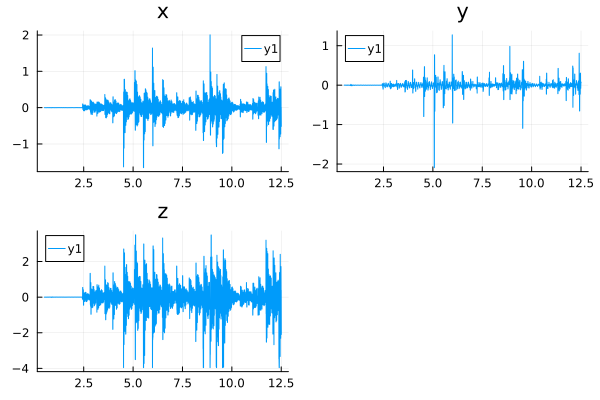

In [32]:
p1 = plot(p_time_sen, p_accx .- p_accx[1], title="x")
p2=plot(p_time_sen, p_accy .- p_accy[1], title="y")
p3 = plot(p_time_sen, p_accz .- p_accz[1], title="z")
plot(p1,p2,p3)

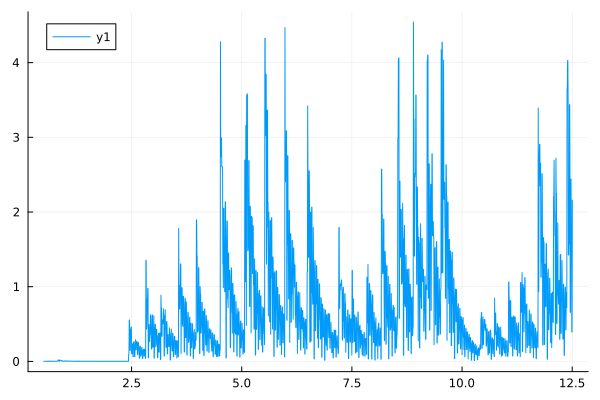

In [19]:
x_corr = p_accx .- p_accx[1]
y_corr = p_accy .- p_accy[1]
z_corr = p_accz .- p_accz[1]

p_amp = sqrt.(x_corr .* x_corr + y_corr .* y_corr + z_corr .* z_corr)

plot(p_time_sen, p_amp)

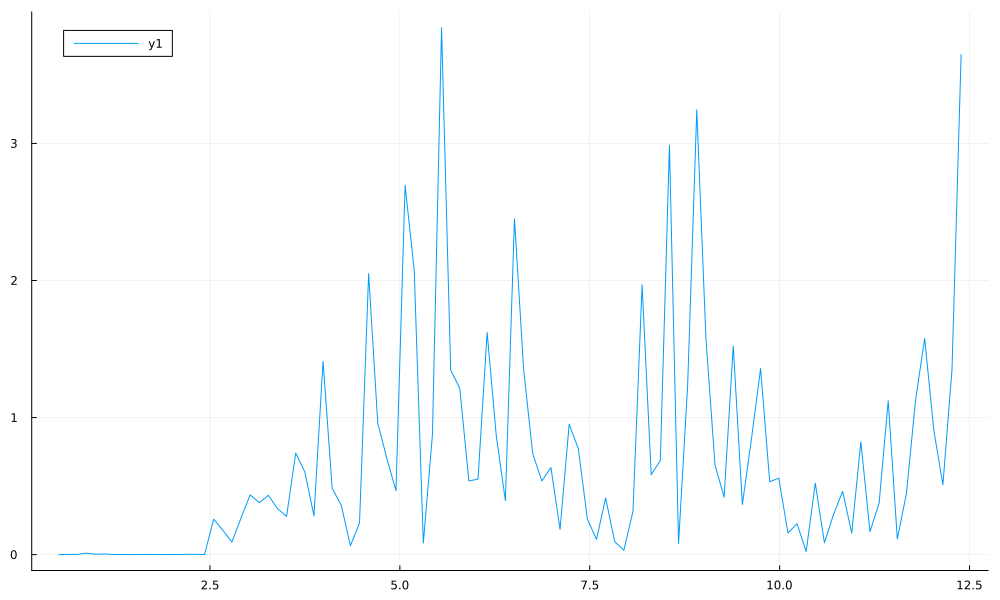

In [54]:
plot(p_time_sen[1:20:end], p_amp[1:20:end], size=(1000, 600))

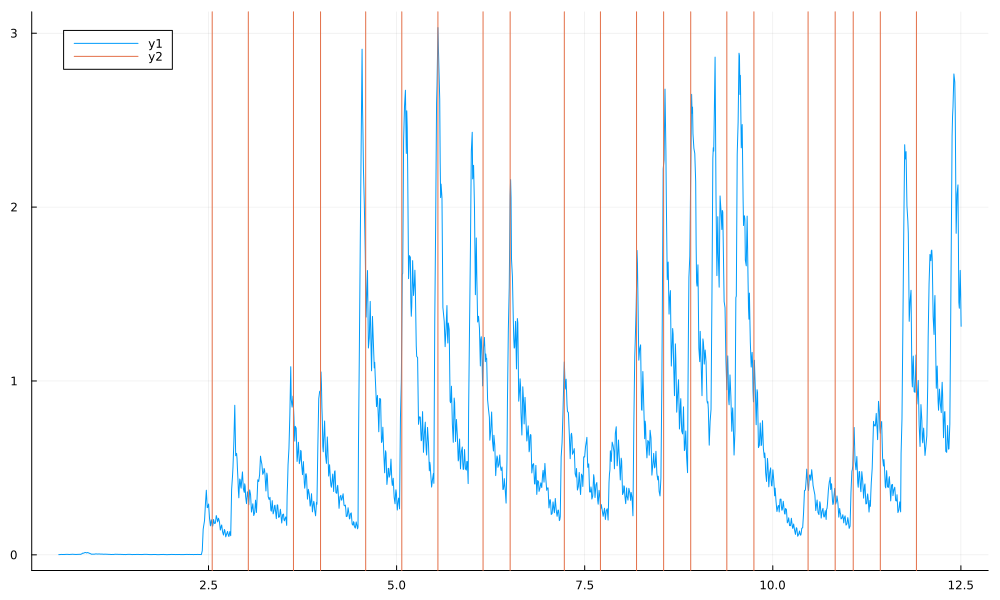

In [60]:
time = p_time_sen[1:20:end]
val = p_amp[1:20:end]

peak = zeros(length(val), 1)
ind = 0
for i in 2:lastindex(val)-1
    if val[i] - val[i-1] > 0.1 && val[i+1] < val[i]
        ind = ind + 1
        peak[ind] = time[i] 
    end
end
peak = peak[1:ind]

plot(p_time_sen, movingaverage(p_amp, 9), size=(1000, 600))
#plot(p_time_sen, p_amp, size=(1000, 600))
vline!(peak)

In [67]:
vec = movingaverage(p_amp, 9)
t = p_time_sen

tol = 0.4
tol_inv = 0.1
min_val = 0

peak = zeros(length(vec), 1)
ind = 0
ispeak = false
for i in 1:lastindex(vec)
    v = vec[i]
    if v - min_val > tol || (ispeak && (min_val - v < tol_inv || v > min_val))
        if !ispeak 
            ind = ind + 1
        end
        peak[ind] = t[i]
        if v > min_val
            min_val = v
        end
        ispeak = true
    else
        ispeak = false
    end

    if v < min_val
        min_val = v
    end
end
peak = peak[1:ind]

20-element Vector{Float64}:
  2.8490629999999997
  3.5930619999999998
  4.001062
  4.541062999999999
  5.117062
  5.549062999999999
  6.005062
  6.515063
  7.529077999999999
  7.919061999999999
  8.201063
  8.567063
  8.921062
  9.233063
  9.335061999999999
  9.557063
 11.447063
 11.771063
 12.119062999999999
 12.419063

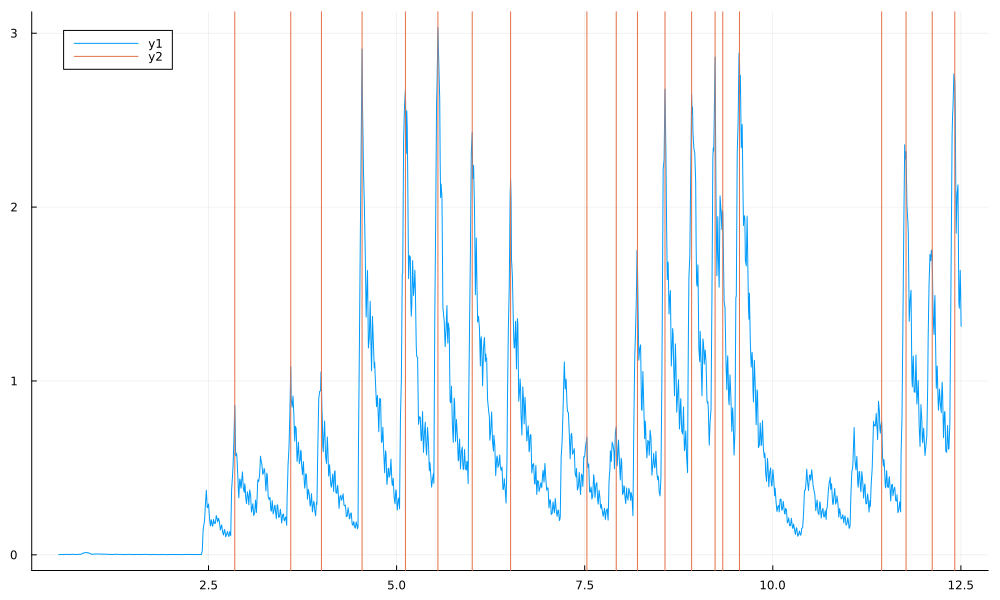

In [68]:
plot(p_time_sen, movingaverage(p_amp, 9), size=(1000, 600))
vline!(peak)

In [ ]:
plot(p_time_sen, p_angle)

In [ ]:
plot(p_time_sen, p_angle)

In [ ]:
plot(p_time_sen, p_angle)

In [ ]:
l = @layout [
    Plots.grid(3,3)
]

p1 = plot(p_time_sen, p_angle, ylabel="angle", legend=false)
p2 = plot(p_time_sen, p_speed, ylabel="speed", legend=false)
p3 = plot(p_time_sen, p_torque, ylabel="torque", legend=false)
p4 = plot(p_time_sen, p_voltage, ylabel="voltage", legend=false)
p5 = plot(p_time_sen, p_current, ylabel="current", legend=false)
p6 = plot(p_time_sen, p_power, ylabel="power", legend=false)
p7 = plot(p_time_sen, p_volt_sent./1000, ylabel="voltage sent", legend=false)

plot(p1, p2, p3, p4, p5, p6, p7, layout=l, size=(1800, 1000), bottommargin=20px, leftmargin=20px)

In [ ]:
# Differentiator
mat_sys = creadToArray(string(base_name, "_system.bin"))

p_time_sys = mat_sys[1, :];
error_in = mat_sys[2, :];
neuron1 = mat_sys[3, :];
neuron2 = mat_sys[4, :];
angle_in = mat_sys[5, :];
syn1 = mat_sys[6, :];
syn2 = mat_sys[7, :];

In [ ]:
# WTA
mat_sys = creadToArray(string(base_name, "_system.bin"))

p_time_sys = mat_sys[1, :];
out1 = mat_sys[2, :];
out2 = mat_sys[3, :];
in1 = mat_sys[4, :];
in2 = mat_sys[5, :];


In [ ]:
plot(p_time_sys, out1, label="Out 1")
plot!(p_time_sys, out2, label="Out 2")
plot!(p_time_sys, in1./10, label="In 1")
plot!(p_time_sys, in2./10, size=(1200,500), label="In 2")

In [ ]:
plot(p_time_sys, syn2 .- syn1)

In [ ]:
plot(p_time_sys, cos.(angle_in.+0.1))
plot!(p_time_sys, syn2 .- syn1)

In [ ]:
plot(p_time_sys, neuron1)
plot!(p_time_sys, neuron2)
plot!(p_time_sys, cos.(angle_in), size=(1000,500))

In [ ]:
(1/2)^40

In [ ]:
# Differentiatio
mat_sys = creadToArray(string(base_name, "_system.bin"))

p_time_sys = mat_sys[1, :];
p_neuron1 = mat_sys[2, :];
p_neuron2 = mat_sys[3, :];
output = mat_sys[4, :];
input = mat_sys[5, :];

In [ ]:
plot(p_time_sys, input)

In [ ]:
plot(p_time_sys, p_neuron1)
plot!(p_time_sys, p_neuron2)
plot!(p_time_sys, input .- 5, size=(1800, 1000), bottommargin=20px, leftmargin=20px)

In [ ]:
savefig("drum_hit.png")

In [ ]:
mat_sys = creadToArray(string(base_name, "_system.bin"))

p_time_sys = mat_sys[1, :];
p_neuron1 = mat_sys[2, :];
p_neuron2 = mat_sys[3, :];
p_in_neuron1 = mat_sys[4, :];
p_in_neuron2 = mat_sys[5, :];

In [ ]:
l = @layout [
    Plots.grid(3,3)
]

p1 = plot(p_time_sys, p_out, ylabel="out", legend=false)
p2 = plot(p_time_sys, p_angle_filt, ylabel="angle", legend=false)
p3 = plot(p_time_sys, p_speed_filt, ylabel="speed", legend=false)
p4 = plot(p_time_sys, p_neuron1, ylabel="neuron1", legend=false)
p5 = plot(p_time_sys, p_neuron2, ylabel="neuron2", legend=false)
p6 = plot(p_time_sys, p_in_neuron1, ylabel="neuron1 input", legend=false)
p7 = plot(p_time_sys, p_in_neuron2, ylabel="neuron2 input", legend=false)

plot(p1, p2, p3, p4, p5, p6, p7, layout=l, size=(1800, 1000), bottommargin=20px, leftmargin=20px)

In [ ]:
T_lim = 10.0 .+ max(p_time_sen[1], p_time_sys[1])

ind_good_sen = p_time_sen .> T_lim;
T_theta = p_time_sen[ind_good_sen];
theta = p_angle[ind_good_sen];
theta_dot = movingaverage(p_speed, 50)[ind_good_sen];
ind_good_sys = p_time_sys .> T_lim;
T_V = p_time_sys[ind_good_sys];
V_push = p_neuron1[ind_good_sys];
V_pull = p_neuron2[ind_good_sys];

In [ ]:
T_lim = 10.0
ind_good_sen = p_time_sen .> T_lim;
T_theta = p_time_sen[ind_good_sen];
theta = p_angle[ind_good_sen];
theta_dot = movingaverage(p_speed, 50)[ind_good_sen];

In [ ]:
ind_good_sen = p_time_sen .> T_lim;
T_theta = p_time_sen[ind_good_sen];
theta = movingaverage(p_voltage, 25)[ind_good_sen];
theta_dot = movingaverage(p_speed_sensor, 25)[ind_good_sen];

In [ ]:
plot(T_V, V_push)
plot!(T_V, V_pull)

In [ ]:
plot(T_V, V_push)
plot!(T_V, V_pull)

In [ ]:
a = burst_analysis(T_V, V_pull)
time, lengths, avg, freq = a

In [ ]:
histogram(lengths, nbins=20)#, xlims=(0, 0.001))

In [ ]:
histogram(lengths, nbins=20)#, xlims=(0, 0.001))

In [ ]:
a = burst_analysis(T_V, V_push)
time, lengths, avg, freq = a

In [ ]:
histogram(lengths, nbins=20)

In [ ]:
histogram(lengths, nbins=20)#, xlims=(0, 0.001))

In [ ]:
up, down = computeCrossings(T_theta, theta_dot)

In [ ]:
amp, timing, mean_amp, mean_p = oscillation_analysis(T_theta, theta, theta_dot)

In [ ]:

ind = lastindex(T_theta[T_theta.<timing[1]])

In [ ]:
plot(T_theta, theta, size=(1200, 500), label="Angle", xlabel="Time", margin=20px)
plot!(T_theta, theta_dot.*0.1, size=(1200, 500), label="Filtered Speed (scaled)", linestyle=:dash)
scatter!(timing, amp, label="Peaks detected")
scatter!(timing, timing*0, label="Peaks timing")

In [ ]:
savefig("angle_analysis.png")

In [ ]:
times, len, _, _ = burst_analysis(T_V, V_pull)

In [ ]:
plot(p_time_sen .- p_time_sen[1], p_angle, ylabel="angle [rad]", xlabel="time [s]", size=(1200, 500), margin=20px, xlims=(10, Inf))

In [ ]:
plot(T_V, V_pull, xlabel="time [s]", size=(1200, 500), margin=20px, xlims=(20, Inf), label="neuron pull [V]", ylims=(-Inf, 5.5))
plot!(T_V, V_push, label="neuron push [V]")
plot!(T_theta, theta, label="angle [rad]")

In [ ]:
savefig("too_large_gsm.png")

In [ ]:
plot(T_theta, theta, size=(1200,500))
vline!(up)
vline!(down)

In [ ]:
plot(T_theta, theta)

In [ ]:
a = oscillation_burst_analysis(T_V, V_push, V_pull, T_theta, theta, theta_dot)

In [ ]:
histogram(timer_inter, xlims=(0,0.001))

In [ ]:
max_speed = (200*2*pi)/60 
p_speed_rad = max_speed.*p_speed./100
p_speed_rad_filt = max_speed.*p_speed_filt./100

"""
p_time_sen = df_sensors[!, "1"][:];
p_angle = df_sensors[!, "2"][:];
p_speed = df_sensors[!, "3"][:];
p_torque = df_sensors[!, "4"][:];
p_voltage = df_sensors[!, "5"][:];
p_current = df_sensors[!, "6"][:];
p_power = df_sensors[!, "7"][:];
p_volt_sent = df_sensors[!, "7"][:];
""";

In [ ]:
mul = (200*2*pi)/6000 

In [ ]:
1/mul

In [ ]:
plot(p_time_sen, p_speed_rad, ylabel="Speed", label="Original", linetype=:steppost, size=(1200,600), xlims=(10,15))
plot!(p_time_sys, p_speed_rad_filt, ylabel="Speed", label="Filtered", linetype=:steppost, size=(1200,600), xlims=(10,15))

In [ ]:
torque_power = p_torque.*p_speed_rad;
elec_power = p_voltage.*p_current;

In [ ]:
plot(p_time_sen, torque_power, label="Torque Power", linetype=:steppost, ylabel="Power", size=(1200,600), xlims=(10,15))
plot!(p_time_sen, elec_power, label="Electric Power", linetype=:steppost)

In [ ]:
inputFile = "data\\comp_speed_test_system.bin"
command =`binaryToCSV.exe $inputFile $outputFile`
run(command)

df_time = CSV.read(outputFile, DataFrame);

comp_times = df_time[!, "1"][:];

In [ ]:
median(comp_times)*1e6

In [ ]:
mean(comp_times)*1e6

In [ ]:
std(comp_times)*1e6

In [ ]:
maximum(comp_times)*1e6

In [ ]:
length(comp_times)

In [ ]:
histogram(comp_times*1e6, size=(1000, 600), legend=false, xlabel="Computation Time [µs]", ylabel="Probability", normalize=:probability, bottommargin=20px, leftmargin=20px)

In [ ]:
inputFile = "data\\write_speed_test.bin"
command =`binaryToCSV.exe $inputFile $outputFile`
run(command)

df_write = CSV.read(outputFile, DataFrame);

sizes = df_write[!, "1"][:];
total_times = df_write[!, "2"][:];
write_times = df_write[!, "3"][:];

In [ ]:
plot(sizes, write_times*1e3, legend=false, size=(1000, 600), xlabel="Number of doubles", ylabel="Write Time [ms]", bottommargin=20px, leftmargin=20px)

In [ ]:
plot(sizes, write_times*1e3, legend=false, size=(1000, 600), xlabel="Number of doubles", ylabel="Write Time [ms]", bottommargin=20px, leftmargin=20px, xlims=(1, 1000), ylims=(0, 15))

In [ ]:
rm(outputFile)